# explore_data_gov_sg_api

## Purpose:
Explore the weather-related APIs at https://developers.data.gov.sg.

## History:
- 2017-05 - Benjamin S. Grandey
- 2017-05-29 - Moving from atmos-scripts repository to access-data-gov-sg repository, and renaming from data_gov_sg_explore.ipynb to explore_data_gov_sg_api.ipynb.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

%matplotlib inline

In [2]:
# Get my API keys
from my_api_keys import my_api_dict
# Note: this module, containing my API keys, will not be shared via GitHub
# You can obtain your own API key(s) by registering at https://developers.data.gov.sg
my_key = my_api_dict['data.gov.sg']  # API key for data.gov.sg

## Meta-data for available meteorological APIs
[I added this section after exploring the wind-speed data - see below.]

In [3]:
# Meteorological variables
for variable in ['rainfall', 'wind-speed', 'wind-direction', 'air-temperature', 'relative-humidity']:
    print(variable)
    r = requests.get('https://api.data.gov.sg/v1/environment/{}'.format(variable),
                     headers={'api-key': my_key})
    metadata = r.json()['metadata']
    for key in metadata.keys():
        if key != 'stations':  # don't print information about stations
            print('  {}: {}'.format(key, r.json()['metadata'][key]))

rainfall
  reading_type: TB1 Rainfall 5 Minute Total F
  reading_unit: mm
wind-speed
  reading_type: Wind Speed AVG(S)10M M1M
  reading_unit: knots
wind-direction
  reading_type: Wind Dir AVG (S) 10M M1M
  reading_unit: degrees
air-temperature
  reading_type: DBT 1M F
  reading_unit: deg C
relative-humidity
  reading_type: RH 1M F
  reading_unit: percentage


In [4]:
# 1hr PM2.5 data are also available
r = requests.get('https://api.data.gov.sg/v1/environment/{}'.format('pm25'),
                 headers={'api-key': my_key})
r.json()

{'api_info': {'status': 'healthy'},
 'items': [{'readings': {'pm25_one_hourly': {'central': 6,
     'east': 7,
     'north': 6,
     'south': 5,
     'west': 11}},
   'timestamp': '2017-05-29T12:00:00+08:00',
   'update_timestamp': '2017-05-29T12:06:18+08:00'}],
 'region_metadata': [{'label_location': {'latitude': 1.35735,
    'longitude': 103.94},
   'name': 'east'},
  {'label_location': {'latitude': 1.35735, 'longitude': 103.82},
   'name': 'central'},
  {'label_location': {'latitude': 1.29587, 'longitude': 103.82},
   'name': 'south'},
  {'label_location': {'latitude': 1.41803, 'longitude': 103.82},
   'name': 'north'},
  {'label_location': {'latitude': 1.35735, 'longitude': 103.7},
   'name': 'west'}]}

## Wind-speed

In [5]:
# Query without specifying date_time - returns most recent data?
!date
r = requests.get('https://api.data.gov.sg/v1/environment/wind-speed',
                 headers={'api-key': my_key})
r.json()

Mon May 29 12:35:07 +08 2017


{'api_info': {'status': 'healthy'},
 'items': [{'readings': [{'station_id': 'S117', 'value': 10.3},
    {'station_id': 'S102', 'value': 16.3},
    {'station_id': 'S115', 'value': 8.7},
    {'station_id': 'S104', 'value': 5.3}],
   'timestamp': '2017-05-29T12:25:00+08:00'}],
 'metadata': {'reading_type': 'Wind Speed AVG(S)10M M1M',
  'reading_unit': 'knots',
  'stations': [{'device_id': 'S117',
    'id': 'S117',
    'location': {'latitude': 1.256, 'longitude': 103.679},
    'name': 'Banyan Road'},
   {'device_id': 'S102',
    'id': 'S102',
    'location': {'latitude': 1.189, 'longitude': 103.768},
    'name': 'Semakau Landfill'},
   {'device_id': 'S115',
    'id': 'S115',
    'location': {'latitude': 1.29377, 'longitude': 103.61843},
    'name': 'Tuas South Avenue 3'},
   {'device_id': 'S104',
    'id': 'S104',
    'location': {'latitude': 1.44387, 'longitude': 103.78538},
    'name': 'Woodlands Avenue 9'}]}}

In [6]:
# Re-organize data into DataFrame
df = pd.DataFrame(r.json()['items'][0]['readings'])
df = df.rename(columns={'value': 'wind-speed'})
df['timestamp (SGT)'] = pd.to_datetime(r.json()['items'][0]['timestamp'].split('+')[0])
df

,station_id,wind-speed,timestamp (SGT)
0,S117,10.3,2017-05-29 12:25:00
1,S102,16.3,2017-05-29 12:25:00
2,S115,8.7,2017-05-29 12:25:00
3,S104,5.3,2017-05-29 12:25:00


In [7]:
# Get wind-speed for specific time in past
r = requests.get('https://api.data.gov.sg/v1/environment/wind-speed',
                 headers={'api-key': my_key},
                 params={'date_time': '2016-12-10T00:00:00'})
df = pd.DataFrame(r.json()['items'][0]['readings'])
df = df.rename(columns={'value': 'wind-speed'})
df['timestamp (SGT)'] = pd.to_datetime(r.json()['items'][0]['timestamp'].split('+')[0])
df

,station_id,wind-speed,timestamp (SGT)
0,S109,1.4,2016-12-09 23:59:59
1,S117,4.5,2016-12-09 23:59:59
2,S50,5.6,2016-12-09 23:59:59
3,S107,1.2,2016-12-09 23:59:59
4,S43,2.8,2016-12-09 23:59:59
5,S108,11.2,2016-12-09 23:59:59
6,S44,2.5,2016-12-09 23:59:59
7,S121,1.7,2016-12-09 23:59:59
8,S106,2.7,2016-12-09 23:59:59
9,S06,1.5,2016-12-09 23:59:59


In [8]:
# Get wind-speed at 5-min intervals on a specific date
# Note: if 'date' is used instead of 'date_time', the API appears to timeout
wind_speed_df = pd.DataFrame(columns=['station_id', 'wind-speed', 'timestamp (SGT)'])
for dt in pd.date_range('2017-05-24', periods=(24*12+1), freq='5min'):
    r = requests.get('https://api.data.gov.sg/v1/environment/wind-speed',
                     headers={'api-key': my_key},
                     params={'date_time': dt.strftime('%Y-%m-%dT%H:%M:%S')})
    temp_df = pd.DataFrame(r.json()['items'][0]['readings'])
    temp_df = temp_df.rename(columns={'value': 'wind-speed'})
    temp_df['timestamp (SGT)'] = pd.to_datetime(r.json()['items'][0]['timestamp'].split('+')[0])
    wind_speed_df = wind_speed_df.append(temp_df, ignore_index=True)
wind_speed_df.head(15)

,station_id,wind-speed,timestamp (SGT)
0,S109,5.30000,2017-05-24 00:00:00
1,S117,7.20000,2017-05-24 00:00:00
2,S50,4.70000,2017-05-24 00:00:00
3,S107,8.20000,2017-05-24 00:00:00
4,S43,4.70000,2017-05-24 00:00:00
5,S44,9.30000,2017-05-24 00:00:00
6,S102,8.00000,2017-05-24 00:00:00
7,S122,2.70000,2017-05-24 00:00:00
8,S115,3.10000,2017-05-24 00:00:00
9,S24,6.40000,2017-05-24 00:00:00


In [9]:
wind_speed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 3 columns):
station_id         3660 non-null object
wind-speed         3660 non-null float64
timestamp (SGT)    3660 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.9+ KB


In [10]:
wind_speed_df.groupby('station_id').describe()

wind-speed                                                 
                count       mean       std  min   25%  50%   75%   max
station_id                                                            
S100            289.0   2.712111  2.143018  0.4  1.40  2.1   3.3  14.6
S102            289.0  10.955709  4.726636  3.1  8.20  9.5  12.2  25.7
S104            289.0   5.088235  3.267124  0.6  3.10  4.3   6.4  20.8
S106             94.0   3.710638  2.530522  1.2  1.95  2.9   4.3  11.9
S107            269.0   7.417844  3.005936  1.4  5.10  7.8   9.3  20.2
S109            289.0   4.725952  2.731755  0.6  2.70  4.5   6.0  15.7
S115            289.0   3.435640  2.848040  0.4  1.70  2.7   4.1  17.7
S116            289.0   6.488927  3.932382  0.8  3.90  5.8   8.0  28.2
S117            289.0   6.411764  3.346100  0.4  3.90  6.2   8.5  16.5
S122            289.0   3.257439  2.614374  0.2  1.40  2.7   4.3  22.0
S24             289.0   6.128373  2.876525  0.6  4.10  6.6   8.2  15.2
S43             289.0   4.515917  2.546394  0.6  2.50  4.5   6.0  16.9
S44             118.0   8.016101  3.169350  2.7  5.85  7.2   9.7  17.9
S50             289.0   5.933218  3.711479  0.6  2.90  5.6   7.8  21.6

## Rainfall

In [11]:
# Get rainfall at 5-min intervals on a specific date
rainfall_df = pd.DataFrame(columns=['station_id', 'rainfall', 'timestamp (SGT)'])
for dt in pd.date_range('2017-05-24', periods=(24*12+1), freq='5min'):  # I remember this was a wet day
    r = requests.get('https://api.data.gov.sg/v1/environment/rainfall',
                     headers={'api-key': my_key},
                     params={'date_time': dt.strftime('%Y-%m-%dT%H:%M:%S')})
    temp_df = pd.DataFrame(r.json()['items'][0]['readings'])
    temp_df = temp_df.rename(columns={'value': 'rainfall'})
    temp_df['timestamp (SGT)'] = pd.to_datetime(r.json()['items'][0]['timestamp'].split('+')[0])
    rainfall_df = rainfall_df.append(temp_df, ignore_index=True)
rainfall_df.head(15)

,station_id,rainfall,timestamp (SGT)
0,S77,0,2017-05-24
1,S117,0,2017-05-24
2,S55,0,2017-05-24
3,S64,0,2017-05-24
4,S90,0,2017-05-24
5,S61,0,2017-05-24
6,S114,0,2017-05-24
7,S11,0,2017-05-24
8,S50,0,2017-05-24
9,S101,0,2017-05-24


In [12]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Data columns (total 3 columns):
station_id         13196 non-null object
rainfall           13196 non-null object
timestamp (SGT)    13196 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 309.4+ KB


In [13]:
rainfall_df['rainfall'] = rainfall_df['rainfall'].astype('float')  # convert to float
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Data columns (total 3 columns):
station_id         13196 non-null object
rainfall           13196 non-null float64
timestamp (SGT)    13196 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 309.4+ KB


## Merge wind-speed and rainfall DataFrames

In [14]:
# Union of wind-speed and rainfall data
outer_df = pd.merge(wind_speed_df, rainfall_df, how='outer', on=['station_id', 'timestamp (SGT)'])
outer_df.head(15)

,station_id,wind-speed,timestamp (SGT),rainfall
0,S109,5.30000,2017-05-24 00:00:00,NaN
1,S117,7.20000,2017-05-24 00:00:00,0.0
2,S50,4.70000,2017-05-24 00:00:00,0.0
3,S107,8.20000,2017-05-24 00:00:00,0.0
4,S43,4.70000,2017-05-24 00:00:00,0.0
5,S44,9.30000,2017-05-24 00:00:00,NaN
6,S102,8.00000,2017-05-24 00:00:00,NaN
7,S122,2.70000,2017-05-24 00:00:00,0.0
8,S115,3.10000,2017-05-24 00:00:00,0.0
9,S24,6.40000,2017-05-24 00:00:00,0.0


In [15]:
outer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13535 entries, 0 to 13534
Data columns (total 4 columns):
station_id         13535 non-null object
wind-speed         3660 non-null float64
timestamp (SGT)    13535 non-null datetime64[ns]
rainfall           13196 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 528.7+ KB


In [16]:
# Intersection of wind-speed and rainfall data
inner_df = pd.merge(wind_speed_df, rainfall_df, how='inner', on=['station_id', 'timestamp (SGT)'])
inner_df.head(15)

,station_id,wind-speed,timestamp (SGT),rainfall
0,S117,7.20000,2017-05-24 00:00:00,0.0
1,S50,4.70000,2017-05-24 00:00:00,0.0
2,S107,8.20000,2017-05-24 00:00:00,0.0
3,S43,4.70000,2017-05-24 00:00:00,0.0
4,S122,2.70000,2017-05-24 00:00:00,0.0
5,S115,3.10000,2017-05-24 00:00:00,0.0
6,S24,6.40000,2017-05-24 00:00:00,0.0
7,S116,8.89999,2017-05-24 00:00:00,0.0
8,S104,6.20000,2017-05-24 00:00:00,0.0
9,S117,7.60000,2017-05-24 00:05:00,0.0


In [17]:
inner_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 4 columns):
station_id         3321 non-null object
wind-speed         3321 non-null float64
timestamp (SGT)    3321 non-null datetime64[ns]
rainfall           3321 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 129.7+ KB


In [18]:
inner_df.groupby('station_id').describe()

rainfall                                              wind-speed  \
              count      mean       std  min  25%  50%  75%  max      count   
station_id                                                                    
S100          209.0  0.150239  0.544741  0.0  0.0  0.0  0.0  5.2      209.0   
S102          263.0  0.084411  0.247785  0.0  0.0  0.0  0.0  2.4      263.0   
S104          271.0  0.107011  0.386325  0.0  0.0  0.0  0.0  2.8      271.0   
S106           94.0  0.012766  0.049152  0.0  0.0  0.0  0.0  0.2       94.0   
S107          264.0  0.062121  0.218717  0.0  0.0  0.0  0.0  1.6      264.0   
S109          198.0  0.107071  0.452686  0.0  0.0  0.0  0.0  3.8      198.0   
S115          289.0  0.102422  0.483363  0.0  0.0  0.0  0.0  5.2      289.0   
S116          289.0  0.080277  0.250400  0.0  0.0  0.0  0.0  2.2      289.0   
S117          289.0  0.116263  0.509948  0.0  0.0  0.0  0.0  5.2      289.0   
S122          289.0  0.121799  0.521059  0.0  0.0  0.0  0.0  4.6      289.0   
S24           229.0  0.034061  0.180816  0.0  0.0  0.0  0.0  1.8      229.0   
S43           286.0  0.080420  0.345550  0.0  0.0  0.0  0.0  2.8      286.0   
S44            62.0  0.338710  0.964000  0.0  0.0  0.0  0.0  4.4       62.0   
S50           289.0  0.143945  0.550038  0.0  0.0  0.0  0.0  5.4      289.0   

                                                                 
                 mean       std  min   25%  50%       75%   max  
station_id                                                       
S100         2.782297  2.167332  0.4  1.40  2.1   3.50000  13.8  
S102        11.094676  4.730030  3.3  8.20  9.7  12.70000  25.7  
S104         5.159040  3.333764  0.6  3.10  4.5   6.60000  20.8  
S106         3.710638  2.530522  1.2  1.95  2.9   4.30000  11.9  
S107         7.421970  3.026959  1.4  5.05  7.8   9.35000  20.2  
S109         4.922727  2.834351  0.8  2.90  4.6   6.20000  15.7  
S115         3.435640  2.848040  0.4  1.70  2.7   4.10000  17.7  
S116         6.488927  3.932382  0.8  3.90  5.8   8.00000  28.2  
S117         6.411764  3.346100  0.4  3.90  6.2   8.50000  16.5  
S122         3.257439  2.614374  0.2  1.40  2.7   4.30000  22.0  
S24          6.245414  2.819222  0.6  4.10  6.8   8.39999  13.8  
S43          4.522028  2.555456  0.6  2.50  4.5   6.00000  16.9  
S44          8.540322  3.522176  2.7  6.00  7.7  10.25000  17.9  
S50          5.933218  3.711479  0.6  2.90  5.6   7.80000  21.6

{'id': 'S50', 'device_id': 'S50', 'name': 'Clementi Road', 'location': {'latitude': 1.3337, 'longitude': 103.7768}}


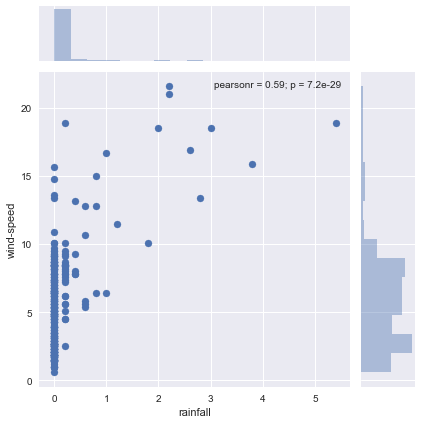

In [19]:
# Quick look at relationship between rainfall and wind-speed for one station and one day
# Information about station S50
r = requests.get('https://api.data.gov.sg/v1/environment/rainfall',
                 headers={'api-key': my_key},
                 params={'date_time': '2017-05-04T00:00:00'})
for d in r.json()['metadata']['stations']:
    if d['device_id'] == 'S50':
        print(d)
# Select data for station S50
s50_df = inner_df.loc[inner_df['station_id'] == 'S50']
# Plot
sns.jointplot(s50_df['rainfall'], s50_df['wind-speed'], kind='scatter')